# LAB 10 - NEURAL NETWORKS

This lab is comprise of 2 examples:

 - 1. Example MNIST 
     - A) Neural Network
     - B) Convolutional Neural Network
 - 2. Poker
 - 3. CTR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random
import tensorflow as tf

# Example MNIST

## Preparing the Data

In [3]:
random.seed(88)
np.random.seed(88)
tf.random.set_seed(88)

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

The most dominant class is '1'. Therefore the baseline accuracy can be computed as:

In [8]:
print('baseline_acc =', 1135/len(y_test))

baseline_acc = 0.1135


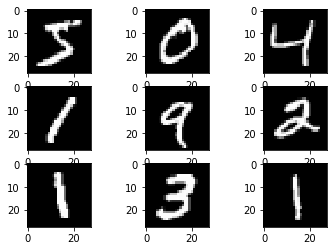

In [9]:
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

Reshape the image data into length 28*28 = 784 feature vectors, then normalize

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_train_reshaped = X_train.reshape(-1, 28*28)
X_train_normalized = X_train_reshaped/255
X_train_normalized.shape

(60000, 28, 28, 1)

In [12]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))
# X_test_reshaped = X_test.reshape(-1, 28*28)
X_test_normalized = X_test_reshaped/255
X_test_normalized.shape

(10000, 28, 28, 1)

### Convert labels to one-hot encoding

In [13]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

## Defining the model
# A Sequential model is appropriate for a plain stack of layers 
# where each layer has exactly one input tensor and one output tensor.
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu')) #, input_shape=(28, 28, 1)))
model.add(Dense(10, activation='softmax'))

## Compiling the model
opt = RMSprop()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
model.fit(X_train_normalized,
          y_train_encoded,
          epochs=5,
          batch_size=128,
          validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 0.4753 - accuracy: 0.8621 - val_loss: 0.1441 - val_accuracy: 0.9591
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1308 - accuracy: 0.9612 - val_loss: 0.1052 - val_accuracy: 0.9686
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.0790 - accuracy: 0.9769 - val_loss: 0.0972 - val_accuracy: 0.9724
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0838 - val_accuracy: 0.9753
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 0.0801 - val_accuracy: 0.9767


In [15]:
loss, acc = model.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9799
0.9799000024795532


## Convolutional Neural Network

In [16]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [17]:
opt = RMSprop()
model2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(X_train_normalized,
           y_train_encoded,
           epochs=5,
           batch_size=64,
           validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 28s 36ms/step - loss: 0.4551 - accuracy: 0.8541 - val_loss: 0.0551 - val_accuracy: 0.9836
Epoch 2/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0461 - val_accuracy: 0.9862
Epoch 3/5
750/750 [==============================] - 32s 43ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0468 - val_accuracy: 0.9867
Epoch 4/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 33s 43ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.0378 - val_accuracy: 0.9903


In [18]:
loss, acc = model2.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0293 - accuracy: 0.9906
0.9905999898910522


# Poker

In [19]:
poker = pd.read_csv('train.csv')

# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 200)
poker.info()
poker.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
S1      25010 non-null int64
C1      25010 non-null int64
S2      25010 non-null int64
C2      25010 non-null int64
S3      25010 non-null int64
C3      25010 non-null int64
S4      25010 non-null int64
C4      25010 non-null int64
S5      25010 non-null int64
C5      25010 non-null int64
hand    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [20]:
#for i in poker:
#    poker[i] = poker[i].astype('category')

In [21]:
#poker_encoded = pd.get_dummies(poker, dtype=float)
#poker_encoded.info()

In [22]:
train = poker.sample(frac=0.7, random_state=88)
test = poker.drop(train.index)

print(poker.shape)
print(train.shape)
print(test.shape)

(25010, 11)
(17507, 11)
(7503, 11)


In [24]:
from sklearn.preprocessing import OneHotEncoder

y_train = train['hand'].astype('category')
X_train = train.drop(columns=['hand'])

y_test = test['hand'].astype('category')
y_test_add = y_test.cat.add_categories('9')
X_test = test.drop(columns=['hand'])

ohe = OneHotEncoder(drop = 'first')
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train).toarray()
X_test_encoded = ohe.transform(X_test).toarray()


y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test_add)
y_test_encoded

hand,0,1,2,3,4,5,6,7,8,9
1,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0
16,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25002,1,0,0,0,0,0,0,0,0,0
25005,0,1,0,0,0,0,0,0,0,0
25006,1,0,0,0,0,0,0,0,0,0
25008,1,0,0,0,0,0,0,0,0,0


In [25]:
# Baseline
pd.Series(train['hand']).value_counts()

0    8731
1    7409
2     854
3     376
4      65
5      35
6      25
9       5
7       4
8       3
Name: hand, dtype: int64

In [26]:
pd.Series(test['hand']).value_counts()

0    3762
1    3190
2     352
3     137
4      28
5      19
6      11
7       2
8       2
Name: hand, dtype: int64

The most dominant class is '0', the baseline accuracy would predict that

In [27]:
print('baseline_acc =', 3762/len(test['hand']))

baseline_acc = 0.5013994402239105


## Linear Discriminant Analysis

In [28]:
#y_train_encoded = train_encoded['hand']
#X_train_encoded = train_encoded.drop(columns=['hand'])

#y_test_encoded = test_encoded['hand']
#X_test_encoded = test_encoded.drop(columns=['hand'])

In [29]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# X_train_encoded = enc.fit_transform(X_train_encoded.reshape(-1, 1))
# X_train_encoded.toarray()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_encoded, y_train)

y_prob_lda = lda.predict_proba(X_test_encoded)
# y_pred_lda = pd.Series([1 if x > 1/2 else 0 for x in y_prob_lda[:,1]], index=y_test_encoded.index)
y_pred_lda = lda.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))


Accuracy: 0.4910035985605758


## Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
import time

tic = time.time()

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88)
rf.fit(X_train_encoded, y_train)

toc = time.time()
print('Random Forest time:', round(toc-tic, 2),'s')

Random Forest time: 7.46 s


In [32]:
y_pred_rf = rf.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 0.6309476209516194


## Neural Networks

In [33]:
#X_train_encoded.head()
#X_train_encoded.shape

In [34]:
# Prep for Keras
#trainX <- model.matrix(hand ~ . , data = train.poker)
#trainX = trainX[,2:76]
#trainY <- model.matrix(~ hand -1, data = train.poker)

#testX <- model.matrix(hand ~ . , data = test.poker)
#testX = testX[,2:76]
#testY <- model.matrix(~ hand -1, data = test.poker)

### Single Hidden Layer Model Sigmoid

Sequential models are created using the `Sequential()` function and are composed of a set of linear layers.

Add A Densely-Connected NN Layer To An Output using `Dense()`

It has arguments object: model, units: number of units, input_shape: Dimensionality of the input, activation: choose activation function



In [35]:
from keras.models import Sequential
from keras.models import Input
from keras.layers import Dense

## Defining the model
nn_mod_1 = Sequential()
nn_mod_1.add(Input(shape=(75,)))
nn_mod_1.add(Dense(100, activation='sigmoid')) #, input_shape=(75)))
nn_mod_1.add(Dense(10, activation='softmax'))

Before training a model, we need to configure the learning process, which is done via the compile() function.
It receives three arguments:
1. An optimizer. 
This could be the string identifier of an existing optimizer (e.g. as “rmsprop” or “adagrad”) or a call to an optimizer function (e.g. optimizer_sgd()).
2. A loss function. 
This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (e.g. “categorical_crossentropy” or “mse”) or a call to a loss function (e.g. loss_mean_squared_error()).
3. A list of metrics. 
For any classification problem you will want to set this to metrics = c('accuracy'). A metric could be the string identifier of an existing metric or a call to metric function (e.g. metric_binary_crossentropy()).

rmsprop is basiclly : Divide the gradient by a running average of its recent magnitude. You can google it to get more information.
Consider it as a sophisticated way to get gradient in gradient descent.

In [36]:
## Compiling the model
opt = RMSprop()
nn_mod_1.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [37]:
## Training the model 

tic = time.time()

nn_mod_1.fit(X_train_encoded,
           y_train_encoded,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 1.1536 - accuracy: 0.4528 - val_loss: 1.0237 - val_accuracy: 0.4800
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 1.0012 - accuracy: 0.5040 - val_loss: 1.0321 - val_accuracy: 0.4786
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9981 - accuracy: 0.4985 - val_loss: 1.0248 - val_accuracy: 0.4792
Epoch 4/100
438/438 [==============================] - 0s 1ms/step - loss: 0.9800 - accuracy: 0.4931 - val_loss: 1.0254 - val_accuracy: 0.4832
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9886 - accuracy: 0.4946 - val_loss: 1.0257 - val_accuracy: 0.4786
Epoch 6/100
438/438 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.4995 - val_loss: 1.0226 - val_accuracy: 0.4743
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9799 - accuracy: 0.5061 - val_loss: 1.0262 - val_accuracy: 0.4792

Epoch 58/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.8924 - val_loss: 0.5552 - val_accuracy: 0.8549
Epoch 59/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.9042 - val_loss: 0.5444 - val_accuracy: 0.8538
Epoch 60/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8982 - val_loss: 0.5354 - val_accuracy: 0.8618
Epoch 61/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4476 - accuracy: 0.8995 - val_loss: 0.5229 - val_accuracy: 0.8601
Epoch 62/100
438/438 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.8986 - val_loss: 0.5149 - val_accuracy: 0.8641
Epoch 63/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.9048 - val_loss: 0.5016 - val_accuracy: 0.8721
Epoch 64/100
438/438 [==============================] - 1s 1ms/step - loss: 0.3950 - accuracy: 0.9084 - val_loss: 0.4973 - val_accuracy:

In [38]:
## Evaluating the model
loss, acc = nn_mod_1.evaluate(X_test_encoded, y_test_encoded)
print(acc)

235/235 [==============================] - 0s 997us/step - loss: 0.3434 - accuracy: 0.8982
0.8981740474700928


## Single Hidden Layer Model ReLU

Switching sigmoid to ReLU max(0,a)

In [39]:
nn_mod_2 = Sequential()
nn_mod_2.add(Input(shape=(75,)))
nn_mod_2.add(Dense(100, activation='relu'))
nn_mod_2.add(Dense(10, activation='softmax'))

opt = RMSprop()
nn_mod_2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

tic = time.time()

nn_mod_2.fit(X_train_encoded,
           y_train_encoded,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

loss, acc = nn_mod_2.evaluate(X_test_encoded, y_test_encoded)
print(acc)

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 1.2545 - accuracy: 0.4556 - val_loss: 1.0271 - val_accuracy: 0.4874
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9934 - accuracy: 0.5143 - val_loss: 1.0242 - val_accuracy: 0.5143
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9721 - accuracy: 0.5506 - val_loss: 1.0067 - val_accuracy: 0.5286
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9317 - accuracy: 0.5911 - val_loss: 0.9872 - val_accuracy: 0.5702
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.9149 - accuracy: 0.6360 - val_loss: 0.9625 - val_accuracy: 0.6022
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.8614 - accuracy: 0.6865 - val_loss: 0.9295 - val_accuracy: 0.6371
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.8180 - accuracy: 0.7260 - val_loss: 0.8995 - val_accuracy: 0.6779

Epoch 58/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9739 - val_loss: 0.3697 - val_accuracy: 0.9098
Epoch 59/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9773 - val_loss: 0.3728 - val_accuracy: 0.9075
Epoch 60/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9752 - val_loss: 0.3723 - val_accuracy: 0.9143
Epoch 61/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9759 - val_loss: 0.3713 - val_accuracy: 0.9081
Epoch 62/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9767 - val_loss: 0.3881 - val_accuracy: 0.9098
Epoch 63/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9764 - val_loss: 0.3779 - val_accuracy: 0.9095
Epoch 64/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9804 - val_loss: 0.3756 - val_accuracy:

Is it better than sigmoid?

## Three Hidden Layer Model ReLU

In [40]:
nn_mod_3 = Sequential()
nn_mod_3.add(Input(shape=(75,)))
nn_mod_3.add(Dense(75, activation='relu'))
nn_mod_3.add(Dense(50, activation='relu'))
nn_mod_3.add(Dense(25, activation='relu'))
nn_mod_3.add(Dense(10, activation='softmax'))

opt = RMSprop()
nn_mod_3.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

tic = time.time()

nn_mod_3.fit(X_train_encoded,
           y_train_encoded,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

loss, acc = nn_mod_3.evaluate(X_test_encoded, y_test_encoded)
print(acc)

Epoch 1/100
438/438 [==============================] - 2s 3ms/step - loss: 1.2330 - accuracy: 0.4754 - val_loss: 1.0223 - val_accuracy: 0.4826
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9862 - accuracy: 0.5238 - val_loss: 1.0184 - val_accuracy: 0.5066
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9514 - accuracy: 0.5647 - val_loss: 0.9748 - val_accuracy: 0.5640
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.8795 - accuracy: 0.6162 - val_loss: 0.9267 - val_accuracy: 0.5934
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.8214 - accuracy: 0.6605 - val_loss: 0.8818 - val_accuracy: 0.6191
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.7176 - accuracy: 0.7128 - val_loss: 0.8041 - val_accuracy: 0.6605
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.6335 - accuracy: 0.7601 - val_loss: 0.7261 - val_accuracy: 0.7119

Epoch 58/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9910 - val_loss: 0.7031 - val_accuracy: 0.8584
Epoch 59/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.7659 - val_accuracy: 0.8715
Epoch 60/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.7539 - val_accuracy: 0.8778
Epoch 61/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9871 - val_loss: 0.7499 - val_accuracy: 0.8561
Epoch 62/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9899 - val_loss: 0.8242 - val_accuracy: 0.8772
Epoch 63/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.7530 - val_accuracy: 0.8575
Epoch 64/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.9444 - val_accuracy:

# CTR

In [41]:
ctr = pd.read_csv('CTR.csv')

ctr.info()
ctr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 11 columns):
CTR              6057 non-null float64
titleWords       6057 non-null int64
adWords          6057 non-null int64
depth            6057 non-null int64
position         6057 non-null int64
advCTR           6057 non-null float64
advCTRInPos      6057 non-null float64
queryCTR         6057 non-null float64
queryCTRInPos    6057 non-null float64
gender           6057 non-null object
age              6057 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 520.6+ KB


,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,gender,age
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,male,0-12
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,male,25-30
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,female,13-18
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,female,25-30
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,female,0-12


In [42]:
ctr[['age','gender']] = ctr[['age','gender']].astype('category')
ctr_encoded = pd.get_dummies(ctr, columns = ['age','gender'],drop_first = True)
ctr_encoded

,CTR,titleWords,adWords,depth,position,advCTR,advCTRInPos,queryCTR,queryCTRInPos,age_13-18,age_19-24,age_25-30,age_31-40,age_41+,age_unknown,gender_male,gender_unknown
0,0.0000,8,17,1,1,0.0136,0.0153,0.0000,0.0000,0,0,0,0,0,0,1,0
1,0.0000,9,19,3,3,0.0199,0.0088,0.0394,0.0125,0,0,1,0,0,0,1,0
2,0.0675,6,30,2,1,0.0825,0.1002,0.0200,0.0256,1,0,0,0,0,0,0,0
3,0.0000,5,19,3,2,0.0116,0.0090,0.0042,0.0017,0,0,1,0,0,0,0,0
4,0.0000,10,22,1,1,0.0186,0.0284,0.0294,0.0431,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,0.0182,8,16,1,1,0.0273,0.0356,0.0040,0.0000,0,0,0,0,0,1,0,1
6053,0.0475,6,20,1,1,0.0919,0.0982,0.0000,0.0000,0,0,0,0,0,1,0,1
6054,0.0141,9,26,3,1,0.0496,0.0523,0.0467,0.0668,0,0,0,0,0,1,0,1
6055,0.1339,9,16,2,1,0.0566,0.0610,0.0618,0.1012,0,0,0,0,0,1,0,1


In [43]:
def OSR2(y_pred, y_test, y_train):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [45]:
train_ctr_encoded = ctr_encoded.sample(frac=0.7, random_state=88)
test_ctr_encoded = ctr_encoded.drop(train_ctr_encoded.index)

print(ctr_encoded.shape)
print(train_ctr_encoded.shape)
print(test_ctr_encoded.shape)

(6057, 17)
(4240, 17)
(1817, 17)


In [46]:
y_train_ctr = train_ctr_encoded['CTR']
X_train_ctr_encoded = train_ctr_encoded.drop(columns = ['CTR'])

y_test_ctr = test_ctr_encoded['CTR']
X_test_ctr_encoded = test_ctr_encoded.drop(columns = ['CTR'])


In [47]:
# Prep for Keras
#trainX <- model.matrix(CTR ~ . , data = train.ctr)
#trainX <- trainX[,2:17]
#trainY <- train.ctr$CTR

#testX <- model.matrix(CTR ~ . , data = test.ctr)
#testX <- testX[,2:17]
#testY <- test.ctr$CTR

## Single layer model

In [48]:
nn_mod_1 = Sequential()
nn_mod_1.add(Input(shape=(16,)))
nn_mod_1.add(Dense(15, activation='sigmoid'))
nn_mod_1.add(Dense(1))

opt = RMSprop()
nn_mod_1.compile(optimizer=opt,
                 loss = tf.keras.losses.MeanSquaredError(),
               metrics=['mean_squared_error'])

tic = time.time()

nn_mod_1.fit(X_train_ctr_encoded,
           y_train_ctr,
           epochs=50,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

nn_pred = nn_mod_1.predict(X_test_ctr_encoded).ravel()
print(OSR2(nn_pred, y_test_ctr, y_train_ctr))

Epoch 1/50
106/106 [==============================] - 1s 3ms/step - loss: 2.0963 - mean_squared_error: 2.0963 - val_loss: 0.4616 - val_mean_squared_error: 0.4616
Epoch 2/50
106/106 [==============================] - 0s 1ms/step - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 3/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 4/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 5/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 6/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 7/50
106/106 [========

## Three Hidden Layer Model

In [49]:
nn_mod_2 = Sequential()
nn_mod_2.add(Input(shape=(16,)))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(1))

opt = RMSprop()
nn_mod_2.compile(optimizer=opt,
                 loss = tf.keras.losses.MeanSquaredError(),
               metrics=['mean_squared_error'])

tic = time.time()
nn_mod_2.fit(X_train_ctr_encoded,
           y_train_ctr,
           epochs=50,
           validation_split=0.2)
toc = time.time()
print('Neural Net 2 time:', round(toc-tic, 2),'s')

nn_pred_2 = nn_mod_2.predict(X_test_ctr_encoded).ravel()
print(OSR2(nn_pred_2, y_test_ctr, y_train_ctr))

Epoch 1/50
106/106 [==============================] - 1s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 3/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 6/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 7/50
106/106 [========

## 10 hidden Layer Model

In [50]:
nn_mod_3 = Sequential()
nn_mod_3.add(Input(shape=(16,)))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(15, activation='sigmoid'))
nn_mod_3.add(Dense(1))

opt = RMSprop()
nn_mod_3.compile(optimizer=opt,
                 loss = tf.keras.losses.MeanSquaredError(),
               metrics=['mean_squared_error'])

tic = time.time()
nn_mod_3.fit(X_train_ctr_encoded,
           y_train_ctr,
           epochs=50,
           validation_split=0.2)
toc = time.time()
print('Neural Net 2 time:', round(toc-tic, 2),'s')

nn_pred_3 = nn_mod_2.predict(X_test_ctr_encoded).ravel()
print(OSR2(nn_pred_3, y_test_ctr, y_train_ctr))

Epoch 1/50
106/106 [==============================] - 1s 3ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 3/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 5/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/50
106/106 [========

# EXTRA

In [ ]:
# from sklearn import preprocessing

# lb = preprocessing.LabelBinarizer()
# y_train_encoded = lb.fit_transform(y_train)
# y_train_encoded


# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_train_encoded


# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
# y_train_encoded.toarray()